In [1]:
import pandas as pd
import numpy as np

In [26]:
journal = 'PRA'
snapshots = 20

In [27]:
def read_list_from_file(filename):
    data_list = []
    with open("./"+journal+"/data/" + filename, 'r') as file:
        for line in file:
            data_list.append(int(line.strip()))
    return data_list

In [28]:
jrnl = snapshots * [journal]
tw_no = read_list_from_file('t_ends')
err_ratios = []
fractal_dims = []
avg_degrees = []
per_pros = []

In [29]:
for snapshot in range(snapshots):
    
    snapshot = snapshot + 1
    data = pd.read_csv('./'+journal+'/data/snapshot'+str(snapshot)+'.csv', index_col = 0)
    snapshot = snapshot - 1
    err_ratios.append(data.error_ratio_3m[tw_no[snapshot]])
    fractal_dims.append(data.fractal_dimension_3m[tw_no[snapshot]])
    avg_degrees.append(data.avg_degree_3m[tw_no[snapshot]])
    per_pros.append(data.percolation_3m[tw_no[snapshot]])

In [6]:
pre = pd.DataFrame(data=[jrnl, tw_no, err_ratios, fractal_dims, avg_degrees, per_pros]).transpose()
pre.columns = ['journal', 'time window number', 'error ratio', 'fractal dimension', 'average degree', 'Percolation probability']

In [11]:
prd = pd.DataFrame(data=[jrnl, tw_no, err_ratios, fractal_dims, avg_degrees, per_pros]).transpose()
prd.columns = ['journal', 'time window number', 'error ratio', 'fractal dimension', 'average degree', 'percolation probability']

In [16]:
prc = pd.DataFrame(data=[jrnl, tw_no, err_ratios, fractal_dims, avg_degrees, per_pros]).transpose()
prc.columns = ['journal', 'time window number', 'error ratio', 'fractal dimension', 'average degree', 'percolation probability']

In [21]:
prb = pd.DataFrame(data=[jrnl, tw_no, err_ratios, fractal_dims, avg_degrees, per_pros]).transpose()
prb.columns = ['journal', 'time window number', 'error ratio', 'fractal dimension', 'average degree', 'percolation probability']

In [30]:
pra = pd.DataFrame(data=[jrnl, tw_no, err_ratios, fractal_dims, avg_degrees, per_pros]).transpose()
pra.columns = ['journal', 'time window number', 'error ratio', 'fractal dimension', 'average degree', 'percolation probability']

In [42]:
df = pra.append(prb).append(prc).append(prd).append(pre, ignore_index=True)

/var/folders/29/7w4dbh0x7zd4zcgbqs40z01h0000gn/T/ipykernel_83682/2853404198.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = pra.append(prb).append(prc).append(prd).append(pre, ignore_index=True)
/var/folders/29/7w4dbh0x7zd4zcgbqs40z01h0000gn/T/ipykernel_83682/2853404198.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = pra.append(prb).append(prc).append(prd).append(pre, ignore_index=True)
/var/folders/29/7w4dbh0x7zd4zcgbqs40z01h0000gn/T/ipykernel_83682/2853404198.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = pra.append(prb).append(prc).append(prd).append(pre, ignore_index=True)


In [55]:
df.to_csv('descriptive.csv')

In [44]:
df['log(average degree)'] = np.log(df['average degree'].astype(float))

In [45]:
df['log10(error ratio)'] = np.log10(df['error ratio'].astype(float))

In [47]:
df

,journal,time window number,error ratio,fractal dimension,average degree,percolation probability,log(average degree),log10(error ratio)
0,PRA,16,2.454439,1.517143,2.409224,0.076867,0.879305,0.389952
1,PRA,13,0.016059,2.019256,2.602159,0.081811,0.956342,-1.794273
2,PRA,15,1.164907,1.560237,2.830842,0.129416,1.040574,0.066291
3,PRA,14,4.836413,1.598377,2.98115,0.137264,1.092309,0.684523
4,PRA,7,3.910708,1.590421,3.073806,0.096382,1.122917,0.592255
...,...,...,...,...,...,...,...,...
165,PRE,4,6.004191,1.635545,2.891255,0.11749,1.061691,0.778455
166,PRE,6,0.620303,1.795986,2.996597,0.137446,1.097477,-0.207396
167,PRE,3,1.641761,1.520147,2.900941,0.031019,1.065035,0.215310
168,PRE,3,0.087566,1.57234,2.936978,0.03485,1.077381,-1.057662


Text(0.5, 0, 'Log_10 (error ratio)')

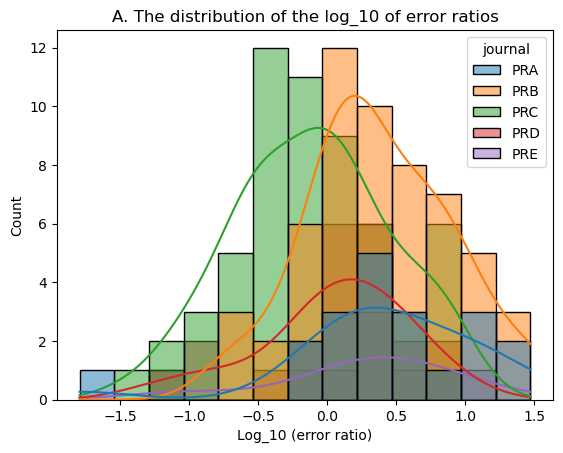

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('A. The distribution of the log_10 of error ratios')
sns.histplot(data=df, x="log10(error ratio)", hue="journal", kde=True)
plt.xlabel('Log_10 (error ratio)')

Text(0.5, 0, 'Fractal dimension')

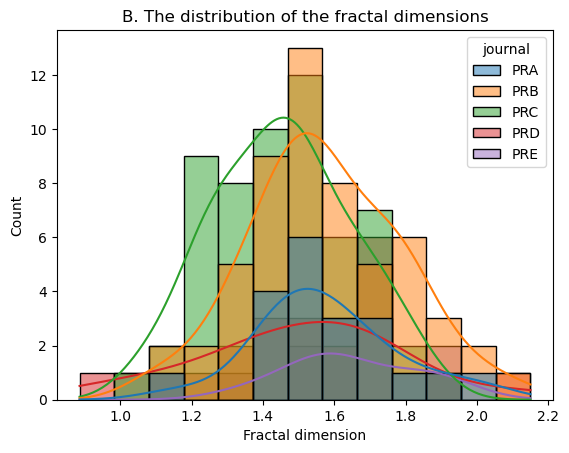

In [70]:
plt.title('B. The distribution of the fractal dimensions')
sns.histplot(data=df, x="fractal dimension", hue="journal", kde=True)
plt.xlabel('Fractal dimension')

Text(0.5, 0, 'Log (average degree)')

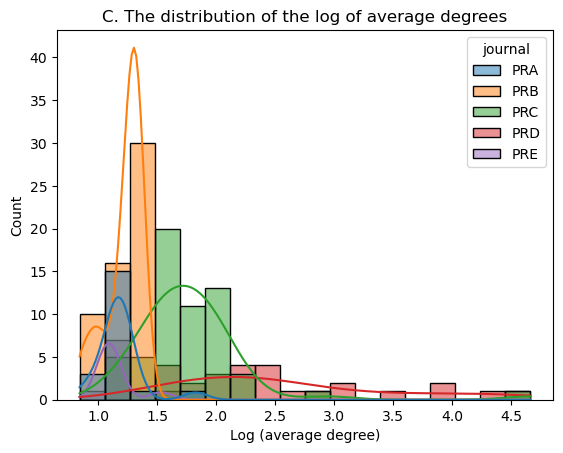

In [72]:
plt.title('C. The distribution of the log of average degrees')
sns.histplot(data=df, x="log(average degree)", hue="journal", kde=True)
plt.xlabel('Log (average degree)')

Text(0.5, 0, 'Percolation probability')

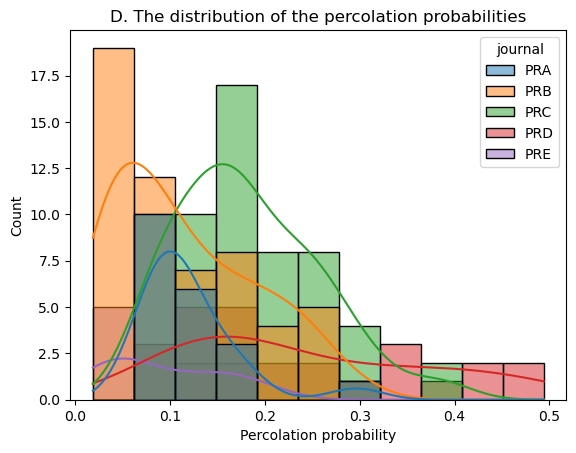

In [73]:
plt.title('D. The distribution of the percolation probabilities')
sns.histplot(data=df, x="percolation probability", hue="journal", kde=True)
plt.xlabel('Percolation probability')

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [105]:
def read_list_from_file(filename):
    data_list = []
    with open("./"+journal+"/data/" + filename, 'r') as file:
        for line in file:
            data_list.append(int(line.strip()))
    return data_list

In [106]:
x = read_list_from_file('t_ends')

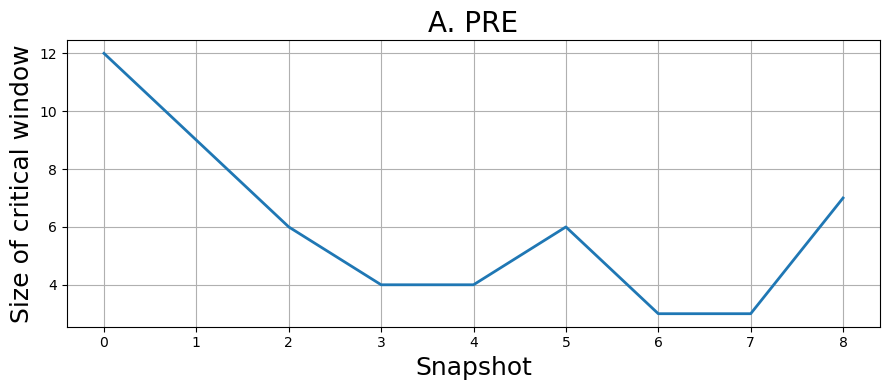

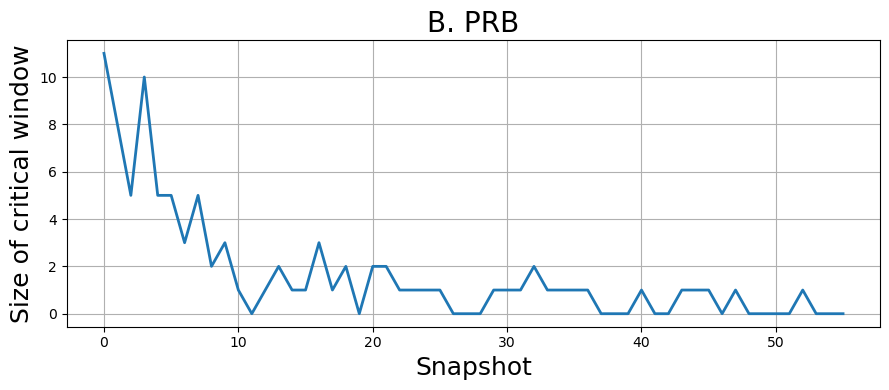

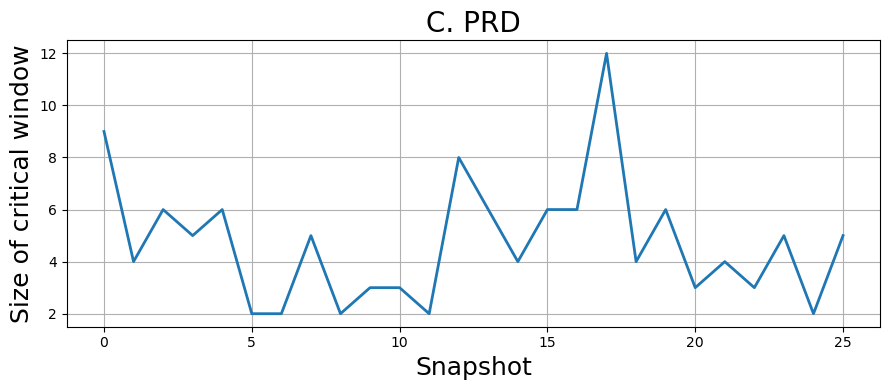

In [132]:
journal = 'PRE'
x = read_list_from_file('t_ends')

fig = plt.figure(figsize=(9, 4))
#     plt.title(title,)
plt.plot(x, lw = 2)
plt.xlabel('Snapshot', fontsize = 18)
plt.ylabel('Size of critical window', fontsize = 18)

plt.tick_params(axis='x',)
plt.tick_params(axis='y',)

plt.title('A. '+journal, fontsize = 20)
plt.grid()



journal = 'PRB'
x = read_list_from_file('t_ends')

fig = plt.figure(figsize=(9, 4))
#     plt.title(title,)
plt.plot(x, lw = 2)
plt.xlabel('Snapshot', fontsize = 18)
plt.ylabel('Size of critical window', fontsize = 18)

plt.tick_params(axis='x',)
plt.tick_params(axis='y',)

plt.title('B. '+journal, fontsize = 20)
plt.grid()

######################################################


journal = 'PRD'
x = read_list_from_file('t_ends')

fig = plt.figure(figsize=(9, 4))
#     plt.title(title,)
plt.plot(x, lw = 2)
plt.xlabel('Snapshot', fontsize = 18)
plt.ylabel('Size of critical window', fontsize = 18)

plt.tick_params(axis='x',)
plt.tick_params(axis='y',)

plt.title('C. '+journal, fontsize = 20)
plt.grid()

######################################################
